<a href="https://colab.research.google.com/github/jeffersonramelo/Textual-Analysis/blob/main/Sentimentos_dicionario_COPOM_EN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
install.packages("readxl")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [26]:
library(readxl)

df <- read_excel("/content/atascopomEN.xlsx")


In [ ]:
head(df)

In [ ]:
summary(df)


In [ ]:
df[214, "texto"]

texto
<chr>


Lei de Zipf(1949) correlação inversa entre frequencia das palavras e seu ranking. Segundo Pao (1978) palavras das extremidades devem ser eliminadas da análise, as mais frequentes são artigos, preposições e conjunções e as menos frequentes são palavras raras. Ambas não possui significado para análise de sentimento.

In [ ]:
frequencia <- table(df$texto)


In [ ]:
ranking <- rank(-frequencia, ties.method = "min")

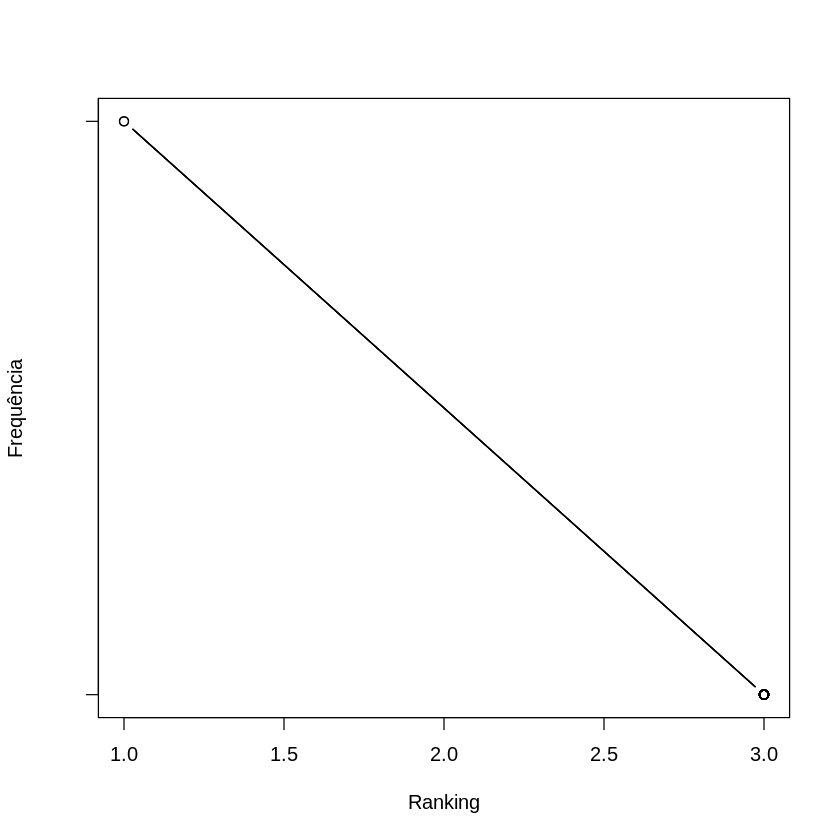

In [ ]:
plot(ranking, frequencia, type = "b", xlab = "Ranking", ylab = "Frequência")

In [ ]:
#TRATAMENTO DOS DADOS, STOP WORS, MINUSCULAS, PONTUAÇÃO, ETC.
install.packages("dplyr")
install.packages("tm")
install.packages("stringr")
install.packages("SnowballC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘Rcpp’, ‘slam’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [19]:
library(dplyr)
library(tm)
library(stringr)
library(SnowballC)

In [20]:
# Carregar lista de stopwords em inglês do pacote tm
data("stopwords")

Warning message in data("stopwords"):
“data set ‘stopwords’ not found”


In [21]:
# Definir lista de stopwords em inglês
stopwords_en <- stopwords("en")

In [27]:
# Função para pré-processamento do texto
preprocess_text <- function(text) {
  # Converter para minúsculas
  text <- tolower(text)
  
  # Remover números
  text <- str_remove_all(text, "[0-9]")
  
  # Remover sinais de pontuação e caracteres especiais
  text <- str_remove_all(text, "[[:punct:]]")
  text <- str_remove_all(text, "[^[:alnum:]\\s]")
  
  # Remover stopwords
  text <- str_split(text, "\\s+") %>%
    unlist() %>%
    setdiff(stopwords_en) %>%
    paste(collapse = " ")
  }

# Aplicar pré-processamento do texto
df$texto <- sapply(df$texto, preprocess_text)

In [28]:
df[214, "texto"]

texto
<chr>


In [31]:
library(tm)

# Criar um corpus com os textos
corpus <- Corpus(VectorSource(df$texto))

# Realizar a stemização das palavras
corpus_stem <- tm_map(corpus, stemDocument)

# Atualizar a coluna "texto" com os resultados da stemização
df$texto <- sapply(corpus_stem, as.character)


In [32]:
df[214, "texto"]

texto
<chr>


In [33]:
# Palavras específicas a serem removidas
palavras_remover <- c("banco", "central", "brasil", "nd", "th", "pm", "am", "brazil")

# Função para remover as palavras específicas
remover_palavras <- function(texto) {
  # Quebrar o texto em palavras
  palavras <- strsplit(texto, "\\s+")
  
  # Remover as palavras específicas
  palavras_filtradas <- palavras[[1]][!palavras[[1]] %in% palavras_remover]
  
  # Reunir as palavras novamente em um texto
  texto_filtrado <- paste(palavras_filtradas, collapse = " ")
  
  return(texto_filtrado)
}

# Aplicar a função de remoção de palavras na coluna "texto"
df$texto <- sapply(df$texto, remover_palavras)


In [35]:
df[214, "texto"]

texto
<chr>


In [36]:
#TOKENIZAR
# Instalar pacotes necessários
install.packages("tidytext")
library(tidytext)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘janeaustenr’, ‘tokenizers’




In [37]:
# Criar novo data frame com as palavras tokenizadas
df_tokenized <- df %>%
  select(ata, texto) %>%
  unnest_tokens(tokenizado, texto)

# Visualizar o novo data frame
head(df_tokenized)

Warning message:
“Outer names are only allowed for unnamed scalar atomic inputs”


ata,tokenizado
<dbl>,<chr>
254,minut
254,meet
254,monetari
254,polici
254,committ
254,copom


In [38]:
#baixar dicionário Loughran e Macdonalds 2011
# Carregar o pacote readr
library(readr)

# Ler o arquivo CSV
dicio <- read_csv("/content/dicionario_LoughranMcdonals.csv")

# Exibir os dados
print(dicio)

Rows: 4150 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): word, sentiment

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 4,150 × 2
   word         sentiment
   <chr>        <chr>    
 1 abandon      negative 
 2 abandoned    negative 
 3 abandoning   negative 
 4 abandonment  negative 
 5 abandonments negative 
 6 abandons     negative 
 7 abdicated    negative 
 8 abdicates    negative 
 9 abdicating   negative 
10 abdication   negative 
# ℹ 4,140 more rows


In [39]:
# Stemização das palavras do dicionário
dicio <- dicio %>%
  mutate(stemmed_word = SnowballC::wordStem(word))

In [40]:
print(dicio)

# A tibble: 4,150 × 3
   word         sentiment stemmed_word
   <chr>        <chr>     <chr>       
 1 abandon      negative  abandon     
 2 abandoned    negative  abandon     
 3 abandoning   negative  abandon     
 4 abandonment  negative  abandon     
 5 abandonments negative  abandon     
 6 abandons     negative  abandon     
 7 abdicated    negative  abdic       
 8 abdicates    negative  abdic       
 9 abdicating   negative  abdic       
10 abdication   negative  abdic       
# ℹ 4,140 more rows


In [41]:
print(df_tokenized)

# A tibble: 175,737 × 2
     ata tokenizado
   <dbl> <chr>     
 1   254 minut     
 2   254 meet      
 3   254 monetari  
 4   254 polici    
 5   254 committ   
 6   254 copom     
 7   254 may       
 8   254 bcbgovbr  
 9   254 date      
10   254 place     
# ℹ 175,727 more rows


In [42]:
# Cruzar os dados do dicionário com os dados do texto"
merged_df <- merge(df_tokenized, dicio, by.x = "tokenizado", by.y = "stemmed_word", all.x = TRUE)

In [43]:
print(merged_df)

            tokenizado ata            word    sentiment
1                   aa  94            <NA>         <NA>
2              abandon  78      abandoning     negative
3              abandon  78    abandonments     negative
4              abandon  78        abandons     negative
5              abandon  78     abandonment     negative
6              abandon  78       abandoned     negative
7              abandon  78         abandon     negative
8              abandon 153      abandoning     negative
9              abandon 153    abandonments     negative
10             abandon 153        abandons     negative
11             abandon 153     abandonment     negative
12             abandon 153       abandoned     negative
13             abandon 153         abandon     negative
14             abandon 201      abandoning     negative
15             abandon 201    abandonments     negative
16             abandon 201        abandons     negative
17             abandon 201     abandonment     n

In [44]:
# Apagar NAs da coluna sentimento
merged_df <- merged_df %>%
  filter(!is.na(sentiment))

In [45]:
merged_df

tokenizado,ata,word,sentiment
<chr>,<dbl>,<chr>,<chr>
abandon,78,abandoning,negative
abandon,78,abandonments,negative
abandon,78,abandons,negative
abandon,78,abandonment,negative
abandon,78,abandoned,negative
abandon,78,abandon,negative
abandon,153,abandoning,negative
abandon,153,abandonments,negative
abandon,153,abandons,negative


In [46]:
# Contar o número de sentimentos positivos e negativos pela coluna "ata"
sentiment_counts <- merged_df %>%
  group_by(ata, sentiment) %>%
  summarise(count = n())

`summarise()` has grouped output by 'ata'. You can override using the `.groups`
argument.


In [47]:
print(sentiment_counts)

# A tibble: 1,219 × 3
# Groups:   ata [210]
     ata sentiment    count
   <dbl> <chr>        <int>
 1    42 constraining    26
 2    42 litigious       11
 3    42 negative       103
 4    42 positive        74
 5    42 superfluous      1
 6    42 uncertainty     37
 7    43 constraining    25
 8    43 litigious       15
 9    43 negative       106
10    43 positive        49
# ℹ 1,209 more rows


In [55]:
sentiment_ata <- sentiment_counts %>%
  group_by(ata) %>%
  summarise(sentiment_ata = case_when(sum(count[sentiment == "positive"]) > sum(count[sentiment == "negative"]) & sum(count[sentiment == "positive"]) > sum(count[sentiment == "neutral"]) ~ "positive",
                                     sum(count[sentiment == "negative"]) > sum(count[sentiment == "positive"]) & sum(count[sentiment == "negative"]) > sum(count[sentiment == "neutral"]) ~ "negative",
                                     sum(count[sentiment == "neutral"]) > sum(count[sentiment == "positive"]) & sum(count[sentiment == "neutral"]) > sum(count[sentiment == "negative"]) ~ "neutral",
                                     TRUE ~ "neutral"))


In [52]:
sentiment_ata

ata,sentiment_ata
<dbl>,<chr>
42,negative
43,negative
45,negative
46,negative
47,negative
48,negative
50,negative
51,negative
52,negative


In [56]:
table(sentiment_ata$sentiment_ata)


negative positive 
     184       26 

In [57]:
# Filtrar as linhas com sentiment_ata igual a "negative"
ata_negative <- sentiment_ata %>% 
  filter(sentiment_ata == "negative") %>%
  select(ata)

# Filtrar as linhas com sentiment_ata igual a "positive"
ata_positive <- sentiment_ata %>% 
  filter(sentiment_ata == "positive") %>%
  select(ata)

# Filtrar as linhas com sentiment_ata igual a "uncertainty"
ata_neutral <- sentiment_ata %>% 
  filter(sentiment_ata == "neutral") %>%
  select(ata)



In [59]:
#saber quais atas deram positive, negative ou neutral
ata_positive$ata

[1]  89 119 127 172 173 185 186 187 188 189 190 191 192 193 194 198 199 204 205
[20] 206 207 208 209 210 238 241

os modelos supervisionados e redes neurais serão rodados em Python

In [62]:
install.packages('writexl')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [63]:
library(writexl)

# Caminho do arquivo xlsx
caminho_arquivo <- "/content/sentiment_ata.xlsx"

# Salvar o dataframe em um arquivo xlsx
write_xlsx(sentiment_ata, caminho_arquivo)
